In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
data=pd.DataFrame(iris.data, columns=iris.feature_names)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


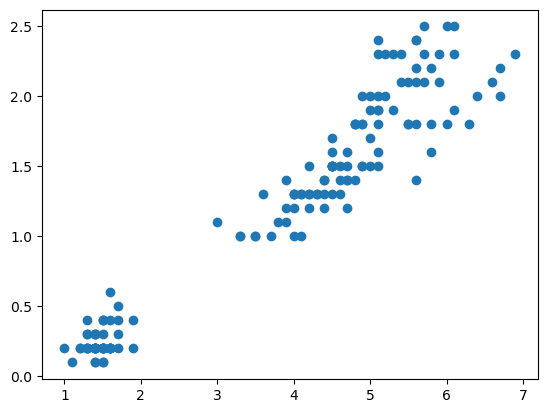

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])

In [19]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(data[['petal length (cm)']],data[['petal width (cm)']])

d:\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
data['cluster']=y_predict
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [21]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]

In [22]:
km.cluster_centers_

array([[5.62826087],
       [1.462     ],
       [4.29074074]])

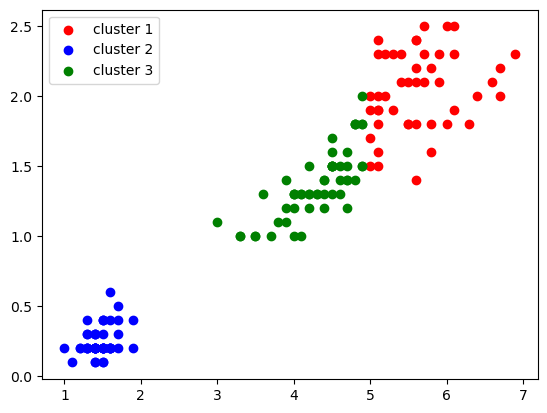

In [24]:
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color="red",label="cluster 1")
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color="blue",label="cluster 2")
plt.scatter(data3['petal length (cm)'],data3['petal width (cm)'], color="green", label="cluster 3")
plt.legend()

In [26]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(data[['petal length (cm)']],data[['petal width (cm)']])
    sse.append(km.inertia_)

d:\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Text(0, 0.5, 'SSE')

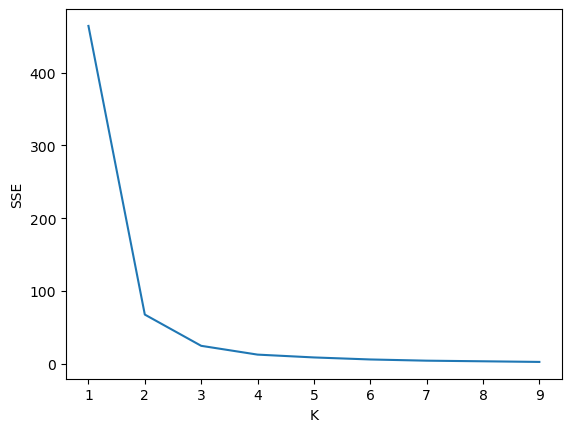

In [27]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('SSE')